In [1]:
import MURA
import shutil
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob


image segmentation

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lB1QyennnnFuKmXvnq3j")
project = rf.workspace("humerussegmentation").project("humerus_segmentation")
dataset = project.version(1).download("png-mask-semantic")


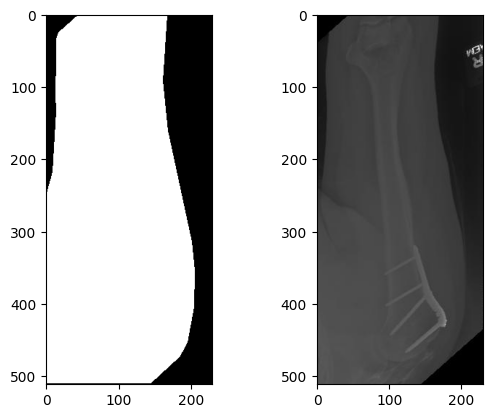

In [54]:
# Load the image
fig, axes = plt.subplots(1, 2)
mask_image = cv2.imread('/home/clr/Thesis/Aron Branch/Humerus_Segmentation.v1i.png-mask-semantic/train/MURA-v1-1-train-XR_HUMERUS-patient00051-study1_positive-image1-png-1-_png.rf.f2b1c59be6d01a1a8734aa340db39406_mask.png', cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread('/home/clr/Thesis/Aron Branch/Humerus_Segmentation.v1i.png-mask-semantic/train/MURA-v1-1-train-XR_HUMERUS-patient00051-study1_positive-image1-png-1-_png.rf.f2b1c59be6d01a1a8734aa340db39406.jpg')
axes[0].imshow(mask_image, cmap='gray')
axes[1].imshow(original_image)

plt.show()

In [38]:
from PIL import Image
mask = np.array(mask_image) > 0
original_array = np.array(original_image)
modified_array = np.copy(original_array)
modified_array[np.logical_not(mask)] = [0, 0, 0]  # Set non-masked pixels to black
output_image = Image.fromarray(modified_array)


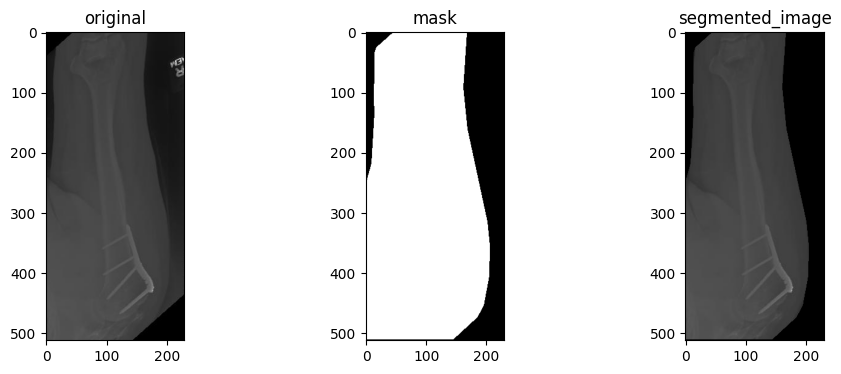

In [39]:
fig, axes = plt.subplots(1, 3 ,figsize=(12, 4))
axes[0].imshow(original_image)
axes[0].set_title('original')

axes[1].imshow(mask_image, cmap='gray')
axes[1].set_title('mask')

axes[2].imshow(output_image)
axes[2].set_title('segmented_image')

plt.subplots_adjust(wspace=0.1)

plt.show()

In [ ]:
output_image.save('/home/cara/Thesis/Aron Branch/Images/Segmented_images/output.png', 'PNG')


## looping thru roboflow images

In [2]:

folder_path = '/home/clr/Thesis/Aron Branch/Humerus_Segmentation.v2i.png-mask-semantic/train'  
image_files = os.listdir(folder_path)

toSegment_images=[],[]

for image in image_files:
    if image.endswith('.png'): #mask
        toSegment_images[0].append(image)
    elif image.endswith('.jpg'): #original
        toSegment_images[1].append(image)


In [3]:
toSegment_images[0].sort(key=lambda x: x.split('-patient')[1].split('-')[0])
toSegment_images[1].sort(key=lambda x: x.split('-patient')[1].split('-')[0])


In [4]:
toSegment_images[0][300]

'MURA-v1-1-train-XR_HUMERUS-patient02792-study1_positive-image2-png_png.rf.35c6b73e37927603bb1a304e412d6d8c_mask.png'

In [5]:
toSegment_images[1][300]

'MURA-v1-1-train-XR_HUMERUS-patient02792-study1_positive-image2-png_png.rf.35c6b73e37927603bb1a304e412d6d8c.jpg'

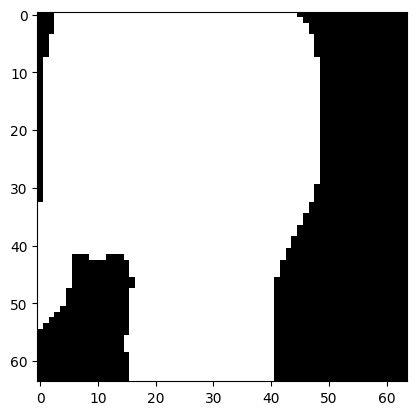

In [7]:

folder_path = '/home/clr/Thesis/Aron Branch/Humerus_Segmentation.v2i.png-mask-semantic/train/'
save_path = '/home/clr/Thesis/Aron Branch/Humerus_Segmentation.v2i.png-mask-semantic/segmented_data/'

for i, images in enumerate(toSegment_images[1]):
    mask_image = cv2.imread(folder_path+toSegment_images[0][i], cv2.IMREAD_GRAYSCALE)
    orig_image = cv2.imread(folder_path+toSegment_images[1][i])
    plt.imshow(mask_image, cmap='gray')
    mask = np.array(mask_image) > 0
    original_array = np.array(orig_image)
    modified_array = np.copy(original_array)
    modified_array[np.logical_not(mask)] = [0, 0, 0]  # Set non-masked pixels to black
    output_image = Image.fromarray(modified_array)
    output_image.save(save_path + toSegment_images[0][i], 'PNG')


In [8]:
image_files = os.listdir(save_path)

positive_data = []
negative_data = []

for item in image_files:
    if 'positive' in item:
        positive_data.append(item)
    elif 'negative' in item:
        negative_data.append(item)

# positives = 667 ; negatives = 722

In [12]:
#sample split: Train 577 negatives; Valid 72 negatives; Test 36 neg 36 pos
train_path = '/home/clr/Thesis/Aron Branch/datasets/test_cara_1/train/'
valid_path = '/home/clr/Thesis/Aron Branch/datasets/test_cara_1/valid/'
test_path = '/home/clr/Thesis/Aron Branch/datasets/test_cara_1/test/'

train = negative_data[0:577]
valid = negative_data[578:649]
test = negative_data[650:685] + positive_data[0:35]



In [13]:
for i, item in enumerate(negative_data[0:577]):
    image = Image.open(save_path+item)
    file_path = os.path.join(train_path, item)
    image.save(file_path)



In [14]:
for i, item in enumerate(negative_data[578:650]):
    image = Image.open(save_path+item)
    file_path = os.path.join(valid_path, item)
    image.save(file_path)


for i, item in enumerate(negative_data[651:687]):
    image = Image.open(save_path+item)
    file_path = os.path.join(test_path, item)
    image.save(file_path)

for i, item in enumerate(positive_data[0:36]):
    image = Image.open(save_path+item)
    file_path = os.path.join(test_path, item)
    image.save(file_path)